# Predicción futura

Modelo cargado: Linear Regression
MAE en test: 26.55
Features requeridas: 14
Último dato histórico: 2023-12-31 23:00:00


C:\Users\Marcos\AppData\Local\Temp\ipykernel_16540\1007075549.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_timestamps = pd.date_range(
c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\Lib\site-packages\sklearn\util


📈 Predicciones generadas para 72 períodos futuros
Rango: 2024-01-01 00:00:00 a 2024-01-03 23:00:00

Primeras 10 predicciones:


c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Marcos\Programacion\industrial-time-series-forecasting\.venv\

,timestamp,predicted_value,temperature,demand_factor
0,2024-01-01 00:00:00,1523.885354,19.075178,0.745712
1,2024-01-01 01:00:00,1496.483252,22.236442,0.694590
2,2024-01-01 02:00:00,1484.229439,23.814889,0.680980
3,2024-01-01 03:00:00,1483.736858,24.061455,0.714798
4,2024-01-01 04:00:00,1466.047950,24.117793,0.616120
5,2024-01-01 05:00:00,1488.577327,23.148812,0.775679
6,2024-01-01 06:00:00,1472.854544,23.788458,0.648811
7,2024-01-01 07:00:00,1483.393804,25.714835,0.719047
8,2024-01-01 08:00:00,1474.744171,24.105883,0.663387
9,2024-01-01 09:00:00,1495.774647,22.470536,0.768698


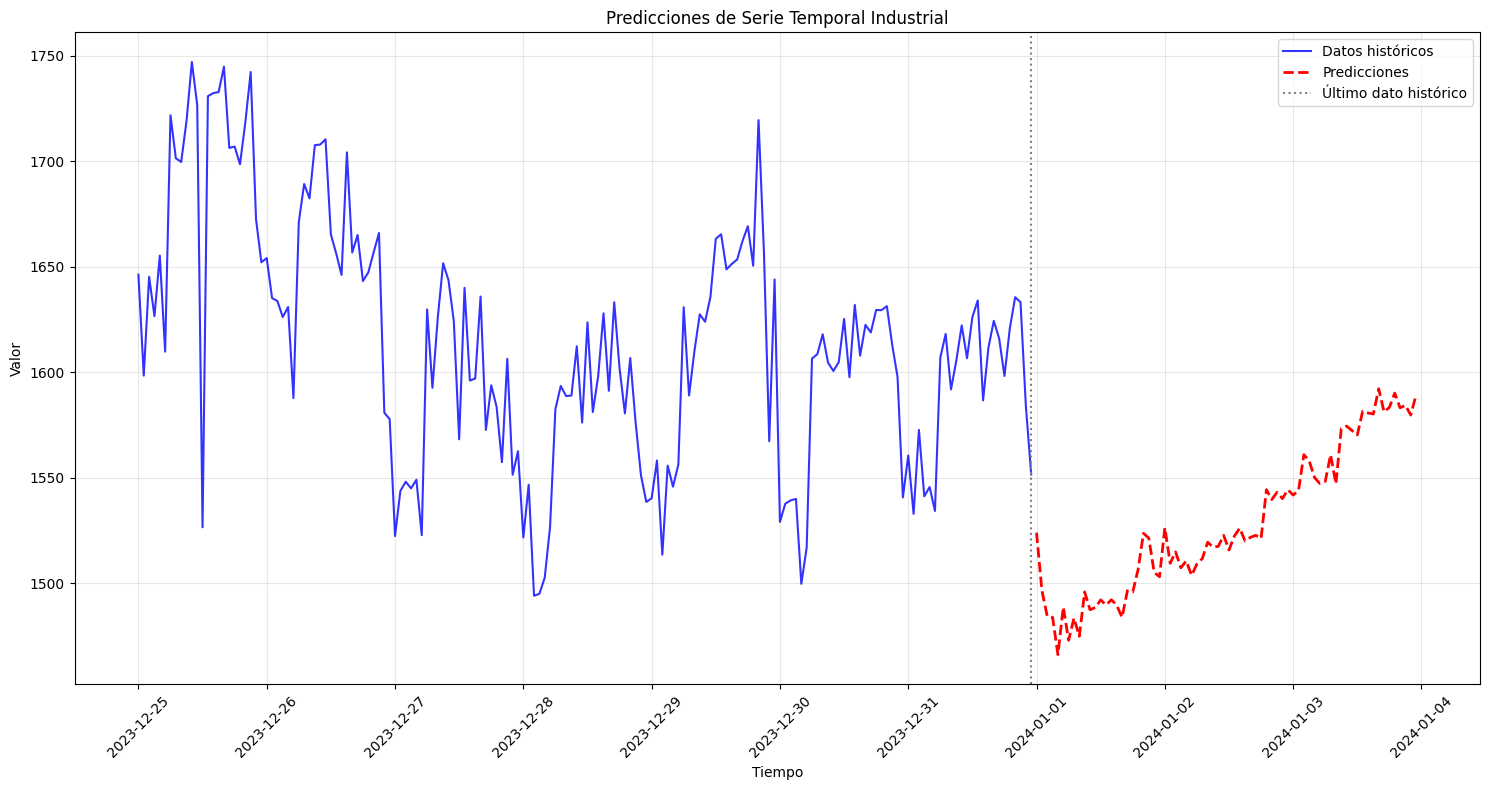


📊 Estadísticas de predicciones:
Valor mínimo predicho: 1466.05
Valor máximo predicho: 1592.17
Valor promedio predicho: 1528.43

✅ Predicciones guardadas en: ../data/processed/future_predictions.csv


In [1]:
# Predicción futura

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Cargar modelo y información
model = joblib.load("../models/best_model.pkl")
model_info = joblib.load("../models/model_info.pkl")

print(f"Modelo cargado: {model_info['model_type']}")
print(f"MAE en test: {model_info['test_mae']:.2f}")
print(f"Features requeridas: {len(model_info['features'])}")

# Cargar datos históricos para crear features de contexto
df_historical = pd.read_csv("../data/processed/industrial_timeseries_featured.csv", 
                           parse_dates=["timestamp"])

print(f"Último dato histórico: {df_historical['timestamp'].max()}")

# Crear datos futuros (próximas 72 horas como ejemplo)
last_timestamp = df_historical['timestamp'].max()
future_timestamps = pd.date_range(
    start=last_timestamp + timedelta(hours=1),
    periods=72,  # 3 días
    freq='H'
)

# Ejemplo de predicción con datos sintéticos futuros
# En un caso real, estas features vendrían de fuentes externas o modelos de predicción

future_data = []
for i, ts in enumerate(future_timestamps):
    # Simular features futuras basadas en patrones históricos
    hour = ts.hour
    day_of_week = ts.dayofweek
    month = ts.month
    is_weekend = 1 if day_of_week >= 5 else 0
    
    # Simular temperatura con patrón estacional
    base_temp = 20 + 10 * np.sin(2 * np.pi * ts.dayofyear / 365)
    daily_var = 5 * np.sin(2 * np.pi * hour / 24)
    temperature = base_temp + daily_var + np.random.normal(0, 1)
    
    # Simular otras features (en producción vendrían de sistemas externos)
    demand_factor = 0.7 + 0.2 * np.sin(2 * np.pi * ts.dayofweek / 7) + np.random.normal(0, 0.05)
    demand_factor = np.clip(demand_factor, 0, 1)
    
    operational_efficiency = 0.85 + np.random.normal(0, 0.02)
    operational_efficiency = np.clip(operational_efficiency, 0.7, 1)
    
    energy_price = 80 + 10 * np.sin(2 * np.pi * hour / 24) + np.random.normal(0, 3)
    energy_price = np.clip(energy_price, 50, 150)
    
    # Para features de lag, usamos los últimos valores históricos o predicciones anteriores
    if i == 0:
        lag_1h = df_historical['value'].iloc[-1]
        lag_24h = df_historical['value'].iloc[-24] if len(df_historical) >= 24 else df_historical['value'].iloc[-1]
        rolling_mean_24h = df_historical['value'].tail(24).mean()
        rolling_std_24h = df_historical['value'].tail(24).std()
    else:
        # En predicciones futuras, usar predicciones anteriores
        lag_1h = future_data[i-1]['predicted_value'] if i > 0 else df_historical['value'].iloc[-1]
        lag_24h = future_data[i-24]['predicted_value'] if i >= 24 else df_historical['value'].iloc[-24]
        
        # Para rolling stats, combinar históricos con predicciones
        recent_values = list(df_historical['value'].tail(24-min(i, 24))) + \
                       [d['predicted_value'] for d in future_data[:min(i, 24)]]
        rolling_mean_24h = np.mean(recent_values)
        rolling_std_24h = np.std(recent_values)
    
    # Features adicionales
    temp_squared = temperature ** 2
    demand_efficiency_interaction = demand_factor * operational_efficiency
    
    future_row = {
        'timestamp': ts,
        'temperature': temperature,
        'demand_factor': demand_factor,
        'operational_efficiency': operational_efficiency,
        'energy_price': energy_price,
        'hour': hour,
        'day_of_week': day_of_week,
        'month': month,
        'is_weekend': is_weekend,
        'lag_1h': lag_1h,
        'lag_24h': lag_24h,
        'rolling_mean_24h': rolling_mean_24h,
        'rolling_std_24h': rolling_std_24h,
        'temp_squared': temp_squared,
        'demand_efficiency_interaction': demand_efficiency_interaction
    }
    
    # Crear array de features para predicción
    feature_array = np.array([[future_row[col] for col in model_info['features']]])
    
    # Hacer predicción
    prediction = model.predict(feature_array)[0]
    future_row['predicted_value'] = prediction
    
    future_data.append(future_row)

# Convertir a DataFrame
future_df = pd.DataFrame(future_data)

print(f"\n📈 Predicciones generadas para {len(future_df)} períodos futuros")
print(f"Rango: {future_df['timestamp'].min()} a {future_df['timestamp'].max()}")

# Mostrar algunas predicciones
print(f"\nPrimeras 10 predicciones:")
display(future_df[['timestamp', 'predicted_value', 'temperature', 'demand_factor']].head(10))

# Visualizar predicciones
plt.figure(figsize=(15, 8))

# Últimos datos históricos
historical_tail = df_historical.tail(168)  # última semana
plt.plot(historical_tail['timestamp'], historical_tail['value'], 
         label='Datos históricos', color='blue', alpha=0.8)

# Predicciones futuras
plt.plot(future_df['timestamp'], future_df['predicted_value'], 
         label='Predicciones', color='red', linestyle='--', linewidth=2)

plt.axvline(x=df_historical['timestamp'].max(), color='gray', linestyle=':', 
            label='Último dato histórico')

plt.title('Predicciones de Serie Temporal Industrial')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Estadísticas de las predicciones
print(f"\n📊 Estadísticas de predicciones:")
print(f"Valor mínimo predicho: {future_df['predicted_value'].min():.2f}")
print(f"Valor máximo predicho: {future_df['predicted_value'].max():.2f}")
print(f"Valor promedio predicho: {future_df['predicted_value'].mean():.2f}")

# Guardar predicciones
future_df.to_csv("../data/processed/future_predictions.csv", index=False)
print(f"\n✅ Predicciones guardadas en: ../data/processed/future_predictions.csv")